In [2]:
# Import Libraries
import os
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing, neighbors
from sklearn import metrics #for confusion matric 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

We will use the OS module to get the name of our voice file

In [3]:
filename = ""
voice = "voice.csv"
dataset = os.listdir("dataset") # return a list of all the filenames in the provided(argument) folder 
if voice in dataset:
    filename = os.path.join(os.getcwd(), "dataset\\{}".format(voice)) # os.getcwd() will return the whole path!
else:
    print("you are trying to read an unexicted file!")
filename

'C:\\Users\\HozRifai\\Desktop\\junior\\dataset\\voice.csv'

We will start using pandas!<br>
Pandas is a popular Python package for data science, and with good reason: it offers powerful, expressive and flexible data<br> structures that make data manipulation and analysis easy, among many other things. The DataFrame is one of these structures.

In [4]:
df = pd.read_csv(filename)
#df.head() # returns first 5 elements in the csv file
#df.info() # this will return some informations about the type of each label
#df.describe() # this will show some Statistical analysis! like min value, max value ...
df.shape

(3168, 21)

In [7]:
# Names and types of each columns
col_names = list(df.columns.values)
print(col_names)
type(df.columns.values)

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


numpy.ndarray

In [ ]:
Analysing our dataset!

In [1]:
# Get the coordination x,y. Where x contains the values and y contains the name of the features
# Try to print x and y to check the results!
x = df.drop(['label'],axis=1) # or you can use np.array(df.drop(...))
y = df.label # you can write any feature(label) directly!
# Convert label feature: female = 0 male = 1
#df['label'] = [1 if i=='male' else 0 for i in data.label]
#y.value_counts() # you can add y.value_counts(normalize=True) to descripe it as percentage from 0 to 1

NameError: name 'df' is not defined

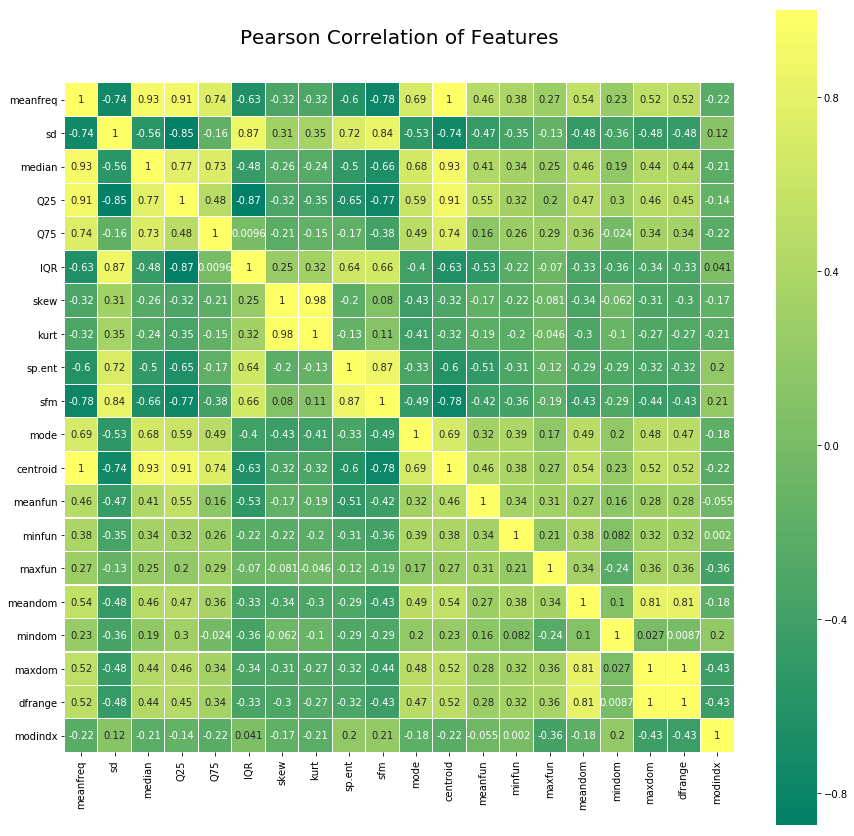

In [104]:
# Heat Map
colormap = plt.cm.summer
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

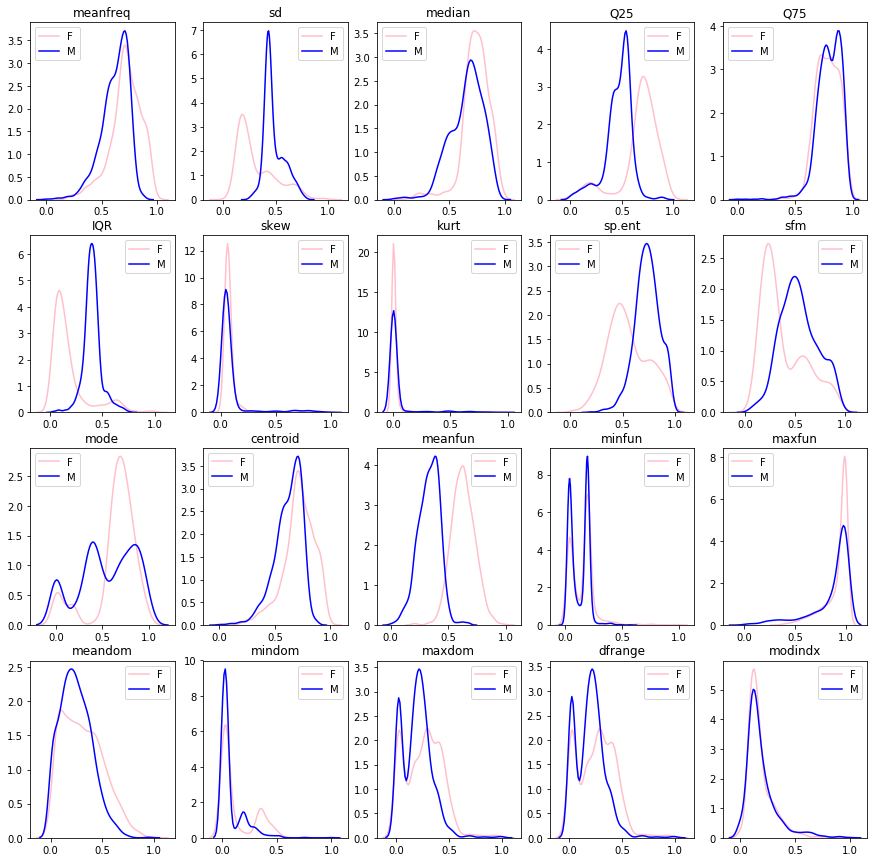

In [96]:
# Visualization
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 0, df.columns[i-1]], color= 'pink', label='F')
    sns.kdeplot(df.loc[df['label'] == 1, df.columns[i-1]], color= 'blue', label='M')

Let's start with algorithms!<br>
I have sorted the following algorithms depending on the accuracy of each!<br><br>
1- Random Forest => 98%<br>
2- KNeighbors => 97%<br>
3- Logistic Regression => 97%<br>
4- Support Vector Machine => 97%<br>
5- Decision Tree => 96%<br>
6- GaussianNB => 89%<br>

In [16]:
#Split the data into training and testing!
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=0)

In [23]:
# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(x_train,y_train)
rf_predict= rand_forest.predict(x_test)
rf_score = metrics.accuracy_score(y_test, rf_predict)

print("Random Forest: Confusion Matrix:\n{0}".format(metrics.confusion_matrix(y_test, rf_predict)))
print("Random Forest: Accuracy Score is: {}\n".format(rf_score))

Random Forest: Confusion Matrix:
[[489   7]
 [ 13 537]]
Random Forest: Accuracy Score is: 0.9808795411089866



In [29]:
# KNeighbors Classifier
KNeighbors = KNeighborsClassifier()
KNeighbors.fit(x_train,y_train)
kn_predict= rand_forest.predict(x_test)
kn_score = metrics.accuracy_score(y_test, KNeighbors.predict(x_test))

print("KNeighbors: Confusion Matrix:\n{0}".format(metrics.confusion_matrix(y_test, kn_predict)))
print("KNeighbors: Accuracy Score is: {}\n".format(kn_score))

KNeighbors: Confusion Matrix:
[[489   7]
 [ 13 537]]
KNeighbors: Accuracy Score is: 0.7217973231357553



In [34]:
# Logistic Regression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
logistic_predict = logistic.predict(x_test)
logistic_score = metrics.accuracy_score(y_test, logistic_predict)

print("logistic Regression: Confusion Matrix:\n{0}".format(metrics.confusion_matrix(y_test, logistic_predict)))
print("logistic Regression: Accuracy Score is: {}\n".format(logistic_score))

logistic Regression: Confusion Matrix:
[[412  84]
 [ 16 534]]
logistic Regression: Accuracy Score is: 0.904397705544933



In [35]:
# Support Vector Machine Classifier  
svc = SVC()
svc.fit(x_train,y_train)
svc_predict= svc.predict(x_test)
svc_score = metrics.accuracy_score(y_test, svc_predict)

print("Support Vector Classifier : Confusion Matrix:\n{0}".format(metrics.confusion_matrix(y_test, svc_predict)))
print("Support Vector Classifier : Accuracy Score is: {}\n".format(svc_score))

Support Vector Classifier : Confusion Matrix:
[[337 159]
 [113 437]]
Support Vector Classifier : Accuracy Score is: 0.739961759082218



In [37]:
# Decision Tree
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
predict= classifier.predict(x_test)
score = metrics.accuracy_score(y_test, classifier.predict(x_test))
print("Decision Tree: Confusion Matrix:\n{0}".format(metrics.confusion_matrix(y_test, predict)))
print("Decision Tree: Accuracy Score is: {}\n".format(score))

Decision Tree: Confusion Matrix:
[[471  25]
 [ 16 534]]
Decision Tree: Accuracy Score is: 0.9608030592734226



In [40]:
# GaussianNB  
GNB = GaussianNB()
GNB.fit(x_train,y_train)
GNB_predict= GNB.predict(x_test)
GNB_score = metrics.accuracy_score(y_test, GNB_predict)

print("GaussianNB: Confusion Matrix:\n{0}".format(metrics.confusion_matrix(y_test, GNB_predict)))
print("GaussianNB: Accuracy Score is: {}\n".format(GNB_score))

GaussianNB: Confusion Matrix:
[[435  61]
 [ 51 499]]
GaussianNB: Accuracy Score is: 0.892925430210325



In [43]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
XGB_predict= GNB.predict(x_test)
XGB_score = metrics.accuracy_score(y_test, XGB_predict)

print("GaussianNB: Confusion Matrix:\n{0}".format(metrics.confusion_matrix(y_test, XGB_predict)))
print("GaussianNB: Accuracy Score is: {}\n".format(XGB_score))

GaussianNB: Confusion Matrix:
[[435  61]
 [ 51 499]]
GaussianNB: Accuracy Score is: 0.892925430210325

